# Capstone Project - North Shore Oahu Wave forecast 

## 1.0 Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from time import time 

In [2]:
df = pd.read_csv(r"C:\Users\edwar\OneDrive\Documents\Digital Futures\Capstone Project\oahufull.csv")
df.head()

,date,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir,nsd,ssd
0,01/01/1990,5,2,1,1,6,6,3,999,999
1,02/01/1990,4,2,1,1,5,5,3,999,999
2,03/01/1990,8,4,2,2,5,5,3,999,999
3,04/01/1990,5,4,1,2,5,5,3,999,999
4,05/01/1990,6,4,1,2,5,6,3,999,999


## 2.0 cleaning data

In [ ]:
df.info()

#### 2.1 Converting date into date into datetime object

In [4]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

#### 2.2 Replace data set assigned nulls (999) with NaN

In [5]:
df.replace(999, np.NaN, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304 entries, 0 to 11303
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11304 non-null  datetime64[ns]
 1   northshore wh    11304 non-null  int64         
 2   west side wh     11304 non-null  int64         
 3   southshore wh    11304 non-null  int64         
 4   diamond head wh  11304 non-null  int64         
 5   east side wh     11304 non-null  int64         
 6   wspd             11304 non-null  int64         
 7   wdir             11185 non-null  float64       
 8   nsd              7464 non-null   float64       
 9   ssd              11304 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 883.3+ KB


#### 2.3 Counting nulls

In [7]:
df.isnull().sum()

date                  0
northshore wh         0
west side wh          0
southshore wh         0
diamond head wh       0
east side wh          0
wspd                  0
wdir                119
nsd                3840
ssd                   0
dtype: int64

In [8]:
## Dropping ssd column, useless and too many 999 values
df = df.drop(['ssd'], axis = 1)

In [9]:
df.shape

(11304, 9)

In [10]:
df.head()

,date,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir,nsd
0,1990-01-01,5,2,1,1,6,6,3.0,NaN
1,1990-01-02,4,2,1,1,5,5,3.0,NaN
2,1990-01-03,8,4,2,2,5,5,3.0,NaN
3,1990-01-04,5,4,1,2,5,5,3.0,NaN
4,1990-01-05,6,4,1,2,5,6,3.0,NaN


#### 2.4 Feature Engineering before null handling models

In [11]:
def speedclean(data):
    data = data.copy()
    data = pd.get_dummies(data, columns = ['wdir'], prefix = 'wdir', drop_first = True, dtype = int)
    data = pd.get_dummies(data, columns = ['nsd'], prefix = 'wdir', drop_first = True, dtype = int)
    return data

In [12]:
dffe = speedclean(df)
dffe

,date,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir_2.0,wdir_3.0,wdir_4.0,...,wdir_2.0,wdir_3.0,wdir_4.0,wdir_5.0,wdir_10.0,wdir_13.0,wdir_14.0,wdir_15.0,wdir_16.0,wdir_18.0
0,1990-01-01,5,2,1,1,6,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1990-01-02,4,2,1,1,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1990-01-03,8,4,2,2,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1990-01-04,5,4,1,2,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1990-01-05,6,4,1,2,5,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11299,2020-12-06,8,4,1,1,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11300,2020-12-07,12,7,1,1,2,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11301,2020-12-08,15,8,2,2,2,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11302,2020-12-09,6,3,2,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 2.4 Handeling nsd nulls

In [13]:
nodate = df.drop('date', axis = 1).copy()
nodate

,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir,nsd
0,5,2,1,1,6,6,3.0,NaN
1,4,2,1,1,5,5,3.0,NaN
2,8,4,2,2,5,5,3.0,NaN
3,5,4,1,2,5,5,3.0,NaN
4,6,4,1,2,5,6,3.0,NaN
...,...,...,...,...,...,...,...,...
11299,8,4,1,1,2,2,17.0,15.0
11300,12,7,1,1,2,3,4.0,16.0
11301,15,8,2,2,2,4,5.0,16.0
11302,6,3,2,2,2,2,17.0,16.0


In [14]:
nodate =  pd.get_dummies(nodate, columns = ['wdir'], prefix = 'wdir', drop_first = True, dtype = int)
nodate

,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,nsd,wdir_2.0,wdir_3.0,wdir_4.0,...,wdir_9.0,wdir_10.0,wdir_11.0,wdir_12.0,wdir_13.0,wdir_14.0,wdir_15.0,wdir_16.0,wdir_17.0,wdir_18.0
0,5,2,1,1,6,6,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,1,1,5,5,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,4,2,2,5,5,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,4,1,2,5,5,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,4,1,2,5,6,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11299,8,4,1,1,2,2,15.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11300,12,7,1,1,2,3,16.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11301,15,8,2,2,2,4,16.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11302,6,3,2,2,2,2,16.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
X_train = nodate[nodate['nsd'].notnull()].drop('nsd', axis = 1)
X_train;

In [16]:
X_test = nodate[df['nsd'].isnull()].drop('nsd', axis = 1)
X_test;

In [17]:
y_train = nodate['nsd'][nodate['nsd'].notnull()]
y_train;

In [18]:
y_test = nodate['nsd'][nodate['nsd'].isnull()]
y_test;

In [19]:
# grid = GridSearchCV(estimator = DecisionTreeClassifier(),  # what is the model
#                     param_grid = {'max_depth': [3, 5, 7, 10], #
#                                   'min_samples_split': [5, 10, 15, 20, 50, 100], #how many samples to make a split
#                                   'min_samples_leaf': [2, 3, 4, 5, 6, 7], # how many samples to make a leaf 
#                                   'max_features':[2,5]}, # How many parameters can I use 
#                     cv = 10,  ## How many splits
#                     refit = True,  ## Do we r3efit the data on each run?
#                     verbose = 1,  ## How much to tell us
#                     scoring = 'accuracy')  ## Which metric am I maximising

In [20]:
# now = time()

# grid.fit(X_train, y_train)

# print(f' Time in seconds: {time() - now}')


In [21]:
# grid.best_params_

In [22]:
# grid.best_score_

In [23]:
dt = DecisionTreeClassifier(max_depth = 10,
                           max_features = 5,
                           min_samples_leaf = 4,
                           min_samples_split = 20)

In [24]:
model = dt.fit(X_train, y_train)

In [25]:
print(f'Score on training set: {dt.score(X_train, y_train)}')

Score on training set: 0.4267148981779207


In [26]:
# plt.figure(figsize=(20,20))
# tree.plot_tree(dt, ##  decision tree classifier 
#                    filled=True)  ## just for aesthetics 
# plt.show()

In [27]:
y_predicted = dt.predict(X_test)

In [28]:
null_indices = df['nsd'].isnull()

In [29]:
df.loc[null_indices, 'nsd'] = y_predicted

In [30]:
nodate.loc[null_indices, 'nsd'] = y_predicted

In [31]:
df.isnull().sum()

date                 0
northshore wh        0
west side wh         0
southshore wh        0
diamond head wh      0
east side wh         0
wspd                 0
wdir               119
nsd                  0
dtype: int64

#### 2.5 Handling wind direction nulls

In [32]:
nodate2 = df.drop('date', axis = 1).copy()
nodate2 = pd.get_dummies(nodate2, columns = ['nsd'], prefix = 'nsd', drop_first = True, dtype = int)

In [33]:
X_train2 = nodate2[nodate2['wdir'].notnull()].drop('wdir', axis = 1)
X_train2;

In [34]:
X_test2 = nodate2[nodate2['wdir'].isnull()].drop('wdir', axis = 1)
X_test2;

In [35]:
y_train2 = nodate2['wdir'][nodate2['wdir'].notnull()]
y_train;

In [36]:
y_test2 = nodate2['wdir'][nodate2['wdir'].isnull()]
y_test2;

In [37]:
# grid = GridSearchCV(estimator = DecisionTreeClassifier(),  # what is the model
#                     param_grid = {'max_depth': [3, 5, 7, 10], #
#                                   'min_samples_split': [5, 10, 15, 20, 50, 100], #how many samples to make a split
#                                   'min_samples_leaf': [2, 3, 4, 5, 6, 7], # how many samples to make a leaf 
#                                   'max_features':[2,5]}, # How many parameters can I use 
#                     cv = 10,  ## How many splits
#                     refit = True,  ## Do we r3efit the data on each run?
#                     verbose = 1,  ## How much to tell us
#                     scoring = 'accuracy')  ## Which metric am I maximising

In [38]:
# now = time()

# grid.fit(X_train, y_train)

# print(f' Time in seconds: {time() - now}')

In [39]:
# grid.best_params_

In [40]:
# grid.best_score_

In [41]:
dt2 = DecisionTreeClassifier(max_depth = 10,
                             max_features = 5,
                             min_samples_leaf = 4,
                             min_samples_split = 100)

In [42]:
dt2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=4,
                       min_samples_split=100)

In [43]:
print(f'Score on training set: {dt.score(X_train, y_train)}')

Score on training set: 0.4267148981779207


In [44]:
y_predicted2 = dt2.predict(X_test2)

In [45]:
null_indices2 = df['wdir'].isnull()

In [46]:
df.loc[null_indices2, 'wdir'] = y_predicted2

In [47]:
df.isnull().sum()

date               0
northshore wh      0
west side wh       0
southshore wh      0
diamond head wh    0
east side wh       0
wspd               0
wdir               0
nsd                0
dtype: int64

#### 2.6 Checking for duplicates 

In [48]:
duplicates = df[df.duplicated()]

In [49]:
duplicates

,date,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir,nsd


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304 entries, 0 to 11303
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11304 non-null  datetime64[ns]
 1   northshore wh    11304 non-null  int64         
 2   west side wh     11304 non-null  int64         
 3   southshore wh    11304 non-null  int64         
 4   diamond head wh  11304 non-null  int64         
 5   east side wh     11304 non-null  int64         
 6   wspd             11304 non-null  int64         
 7   wdir             11304 non-null  float64       
 8   nsd              11304 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 794.9 KB


In [51]:
df.to_csv('oahufullandclean.csv', index=False)

## 3.0 EDA

In [52]:
corr = df.corr()

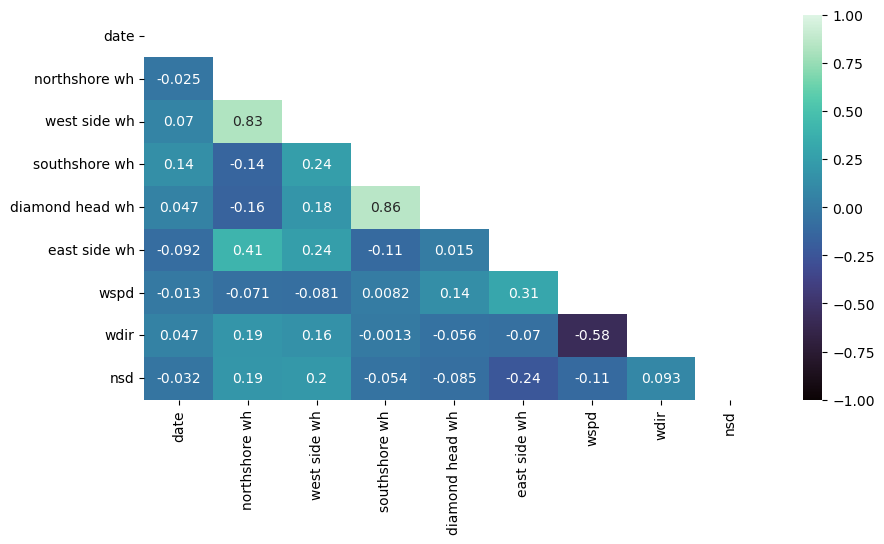

In [53]:
# Correlation heatmap 

plt.figure(figsize = (10,5))
sns.heatmap(data = corr,
            cmap = 'mako',
           annot = True,
           mask = np.triu(corr),
           vmin = -1,
           vmax = 1)
plt.show()

<Axes: >

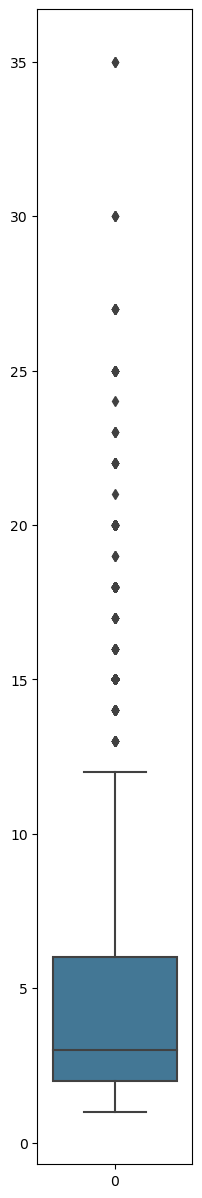

In [89]:
plt.figure(figsize = (2,15))
sns.boxplot(df['northshore wh'],
           palette = 'mako')


AttributeError: Rectangle.set() got an unexpected keyword argument 'annot'

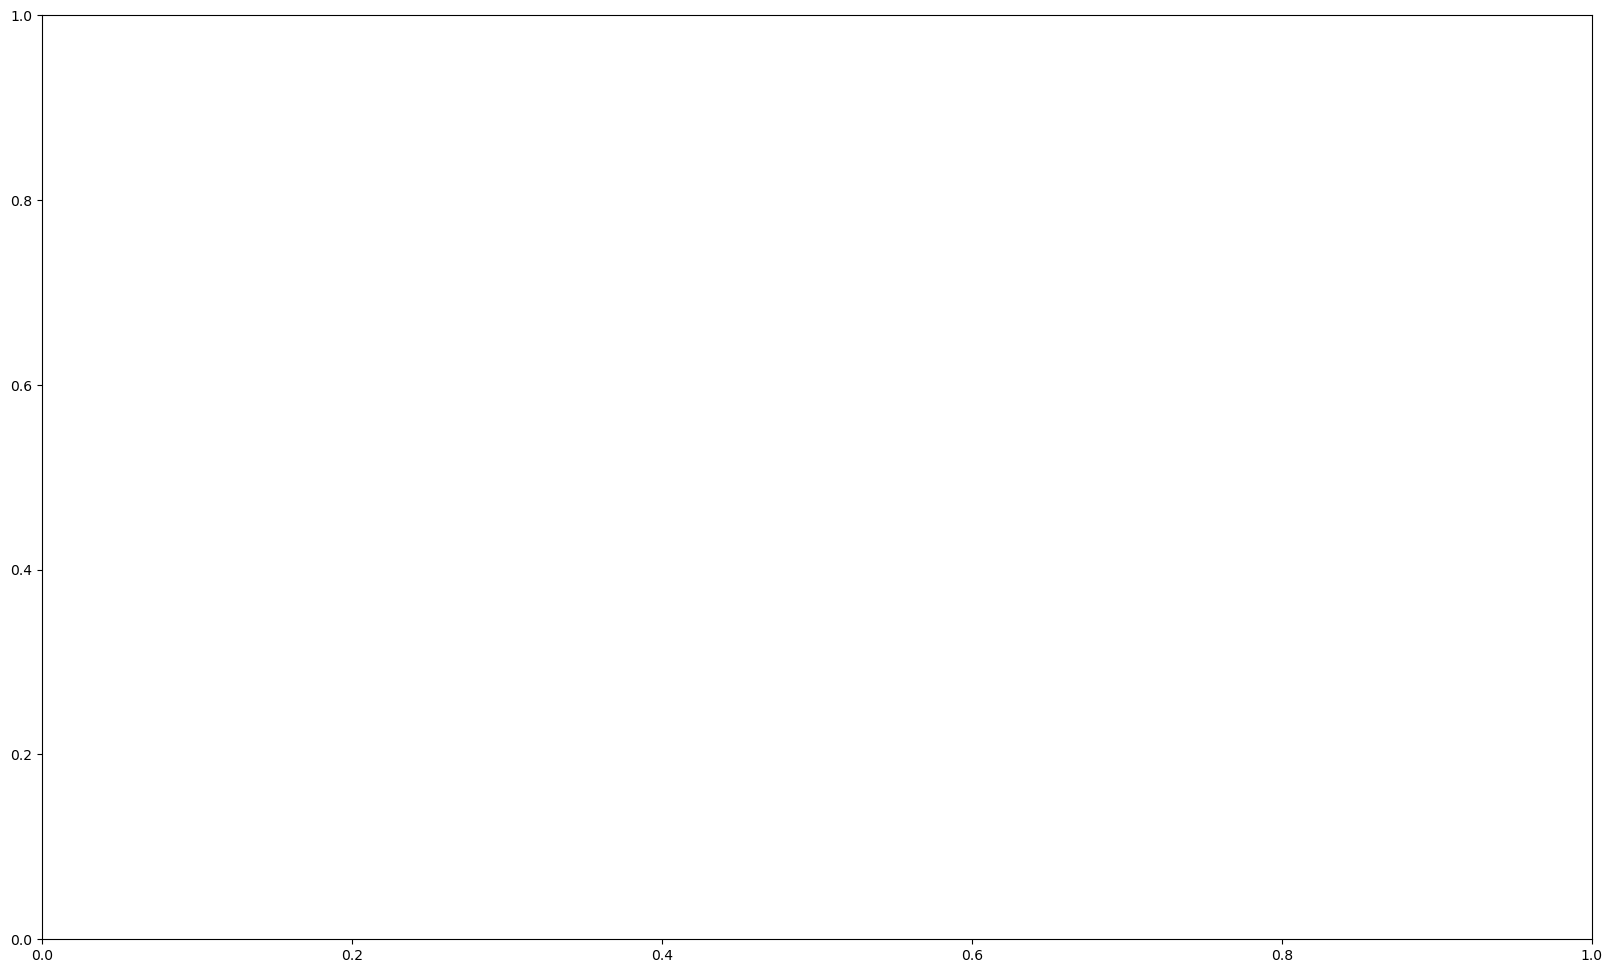

In [76]:
plt.figure(figsize = (20,12))
sns.countplot(df, x = 'northshore wh',
             palette = 'mako_r')
plt.savefig("image.png")
plt.show()


In [54]:
# sns.pairplot(df,
#             hue = 'wspd')
# plt.show();

<Axes: xlabel='northshore wh', ylabel='west side wh'>

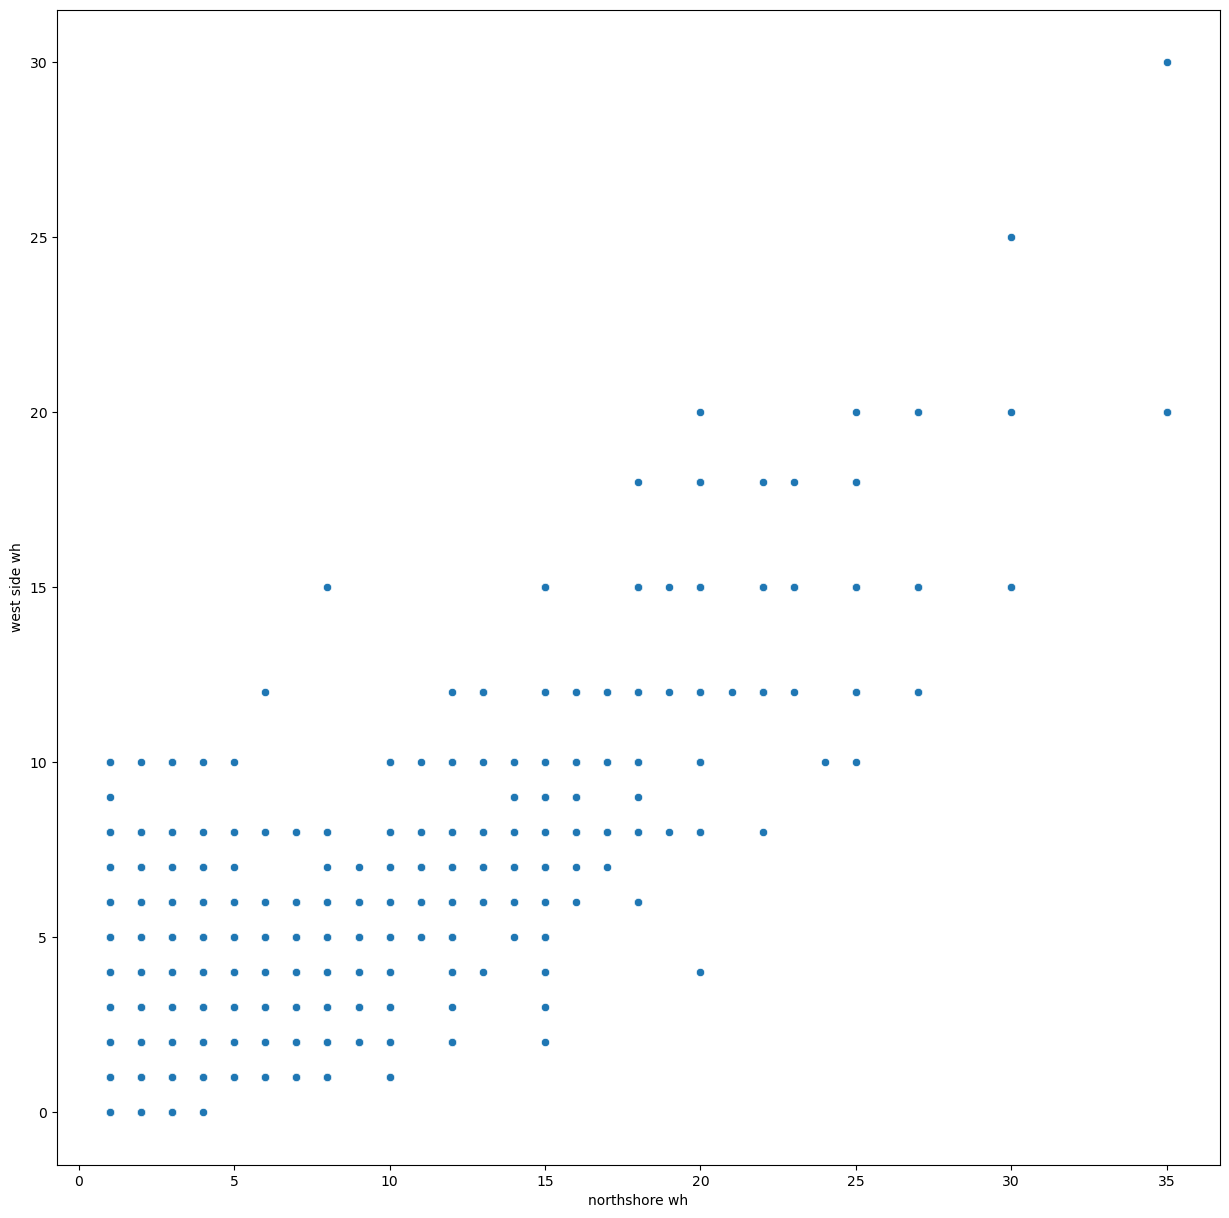

In [68]:
plt.figure(figsize = (15,15))
sns.scatterplot(x="northshore wh", y="west side wh",
             data=df)